
## Data Preprocessing - Delhi House Price Prediction

To apply basic methods for data analysis and data preprocessing for Delhi House Price Dataset

In [132]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None  

### 1. Data Analysis


#### Q1. Load the data from CSV file. Display the first 10 rows and the last 10 rows of the dataset.

In [133]:
#write your code here
df = pd.read_csv('MagicBricks.csv')

first_10_rows = df.head(10)
first_10_rows

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
5,1300.0,4,3.0,Semi-Furnished,Rohini Sector 24,1.0,15500000,Ready_to_move,New_Property,Builder_Floor,6667.0
6,1350.0,4,3.0,Semi-Furnished,Rohini Sector 24,1.0,10000000,Ready_to_move,Resale,Builder_Floor,6667.0
7,650.0,2,2.0,Semi-Furnished,"Delhi Homes, Rohini Sector 24",1.0,4000000,Ready_to_move,New_Property,Apartment,6154.0
8,985.0,3,3.0,Unfurnished,Rohini Sector 21,1.0,6800000,Almost_ready,New_Property,Builder_Floor,6154.0
9,1300.0,4,4.0,Semi-Furnished,Rohini Sector 22,1.0,15000000,Ready_to_move,New_Property,Builder_Floor,6154.0


In [134]:
last_10_rows = df.tail(10)
last_10_rows

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
1249,1900.0,3,4.0,Semi-Furnished,Chittaranjan Park,2.0,28500000,Ready_to_move,New_Property,Builder_Floor,6878.0
1250,1800.0,3,3.0,Semi-Furnished,Chittaranjan Park,2.0,29000000,Ready_to_move,Resale,Builder_Floor,6878.0
1251,1200.0,3,2.0,Semi-Furnished,Chittaranjan Park,1.0,15500000,Ready_to_move,Resale,Builder_Floor,12916.0
1252,1800.0,3,3.0,Semi-Furnished,"Nehru Enclave, Kalkaji",1.0,26000000,Ready_to_move,Resale,Builder_Floor,12916.0
1253,1200.0,3,3.0,Semi-Furnished,Chittaranjan Park,1.0,16500000,Ready_to_move,Resale,Builder_Floor,12916.0
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0
1258,11050.0,3,3.0,Unfurnished,Chittaranjan Park,1.0,18500000,Ready_to_move,New_Property,Builder_Floor,12916.0


##### Q2. Which fields are numerical and which fields are categorical data? which attributes are input variables and which attribute is output variable?

In [135]:
df.dtypes

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

target_variable = 'Price'  

input_variables = df.columns.tolist()
input_variables.remove(target_variable)

print("Input Variables:", input_variables)
print("Output Variable:", target_variable)

Numerical Columns: ['Area', 'BHK', 'Bathroom', 'Parking', 'Price', 'Per_Sqft']
Categorical Columns: ['Furnishing', 'Locality', 'Status', 'Transaction', 'Type']
Input Variables: ['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Status', 'Transaction', 'Type', 'Per_Sqft']
Output Variable: Price


#### Q3. Display summary and statistics information (both numerical and categorical data) of the dataset. What do you know from this information?

In [136]:
#write your code here
df.describe(include='all')

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1254,1259,1226.000000,1.259000e+03,1259,1259,1254,1018.000000
unique,NaN,NaN,NaN,3,365,NaN,NaN,2,2,2,NaN
top,NaN,NaN,NaN,Semi-Furnished,Lajpat Nagar 3,NaN,NaN,Ready_to_move,Resale,Builder_Floor,NaN
freq,NaN,NaN,NaN,708,34,NaN,NaN,1184,781,661,NaN
mean,1466.452724,2.796664,2.556086,NaN,NaN,1.935563,2.130670e+07,NaN,NaN,NaN,15690.136542
std,1568.055040,0.954425,1.042220,NaN,NaN,6.279212,2.560115e+07,NaN,NaN,NaN,21134.738568
min,28.000000,1.000000,1.000000,NaN,NaN,1.000000,1.000000e+06,NaN,NaN,NaN,1259.000000
25%,800.000000,2.000000,2.000000,NaN,NaN,1.000000,5.700000e+06,NaN,NaN,NaN,6364.000000
50%,1200.000000,3.000000,2.000000,NaN,NaN,1.000000,1.420000e+07,NaN,NaN,NaN,11291.500000
75%,1700.000000,3.000000,3.000000,NaN,NaN,2.000000,2.550000e+07,NaN,NaN,NaN,18000.000000


#### Q4. Choose a few numerical and categorical fields and visualize their data using the appropriate graphs (i.e. histogram, boxplot, bar chart and pie chart). What do you know from the graphs?

array([[<Axes: title={'center': 'BHK'}>,
        <Axes: title={'center': 'Bathroom'}>],
       [<Axes: title={'center': 'Furnishing'}>,
        <Axes: title={'center': 'Status'}>]], dtype=object)

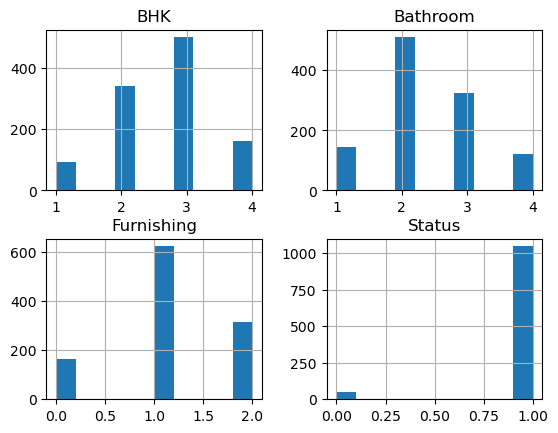

In [164]:
#write your code here
df[['BHK', 'Bathroom', 'Furnishing', 'Status']].hist()

<Axes: >

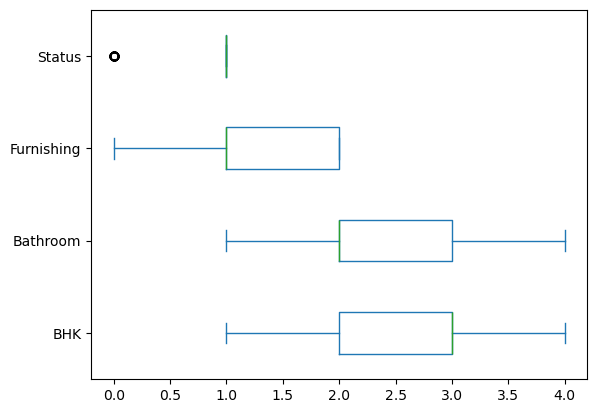

In [163]:
df[['BHK', 'Bathroom', 'Furnishing', 'Status']].plot.box(vert=False)

<Axes: xlabel='Bathroom'>

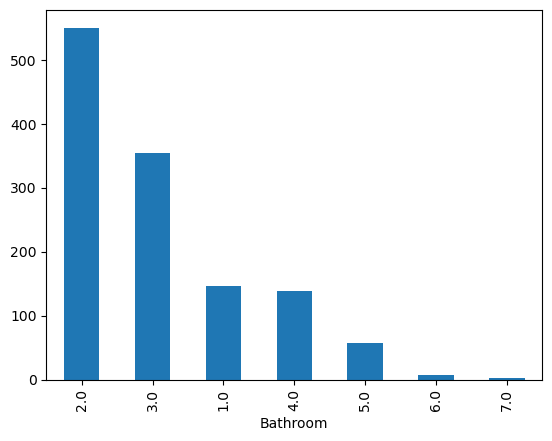

In [139]:
df['Bathroom'].value_counts().plot.bar()

<Axes: xlabel='Furnishing'>

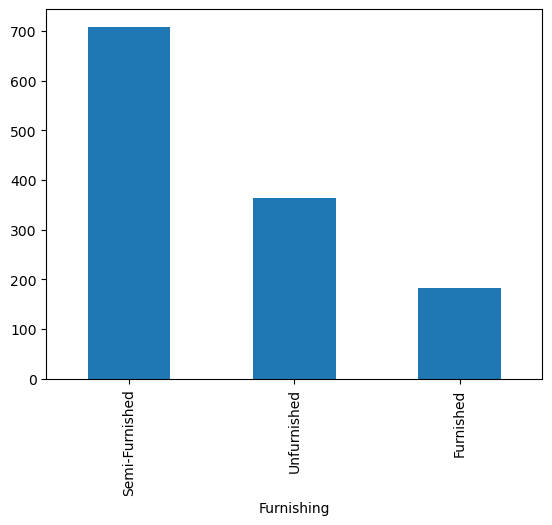

In [140]:
df['Furnishing'].value_counts().plot.bar()

<Axes: ylabel='count'>

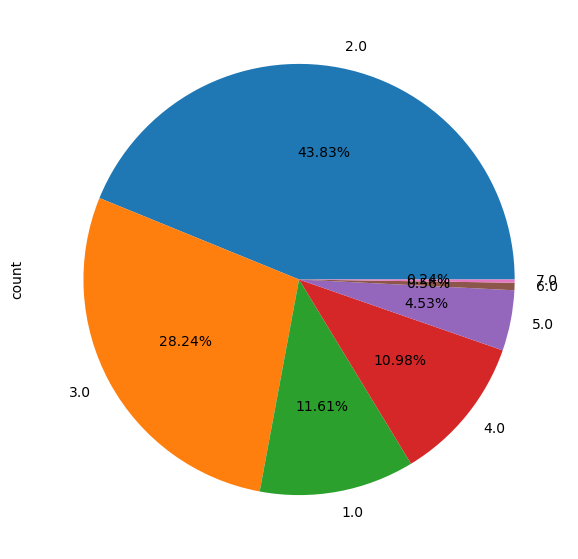

In [141]:
df['Bathroom'].value_counts().plot.pie(autopct='%.2f%%', figsize=(9, 7))

<Axes: ylabel='count'>

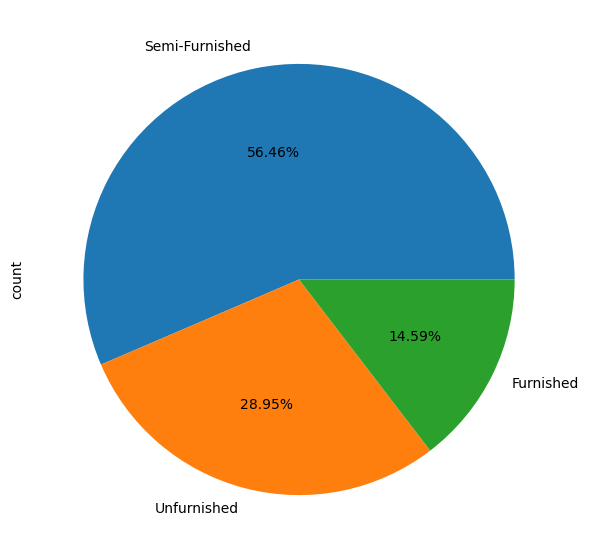

In [142]:
df['Furnishing'].value_counts().plot.pie(autopct='%.2f%%', figsize=(9, 7))

#### Q5. Compute Pearson correlation coefficient between numerical variables. Plot the correlation coefficients on heat map. Describe the information from the coefficients and the graph.

In [143]:
#write your code and answer the questions
numerical_df = df.select_dtypes(include='number')
corr_coef =numerical_df.corr()
corr_coef


,Area,BHK,Bathroom,Parking,Price,Per_Sqft
Area,1.000000,0.449438,0.535104,-0.009297,0.580836,0.162832
BHK,0.449438,1.000000,0.773267,-0.070707,0.571523,0.181540
Bathroom,0.535104,0.773267,1.000000,-0.032796,0.728108,0.219169
Parking,-0.009297,-0.070707,-0.032796,1.000000,-0.000448,0.001607
Price,0.580836,0.571523,0.728108,-0.000448,1.000000,0.322859
Per_Sqft,0.162832,0.181540,0.219169,0.001607,0.322859,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

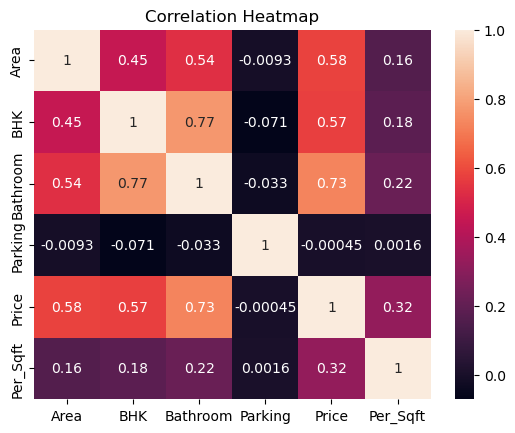

In [144]:
import seaborn as sns
# plot correlation coefficent with heatmap
heatmap = sns.heatmap(corr_coef, annot=True)
heatmap.set_title("Correlation Heatmap")

From the heatmap, we can see that the amount of bathroom has the highest coefficient score to the house price.

#### Q6. Plot scatter plot between area and the price of the properties. What information do you know from the graph?

<Axes: xlabel='Area', ylabel='Price'>

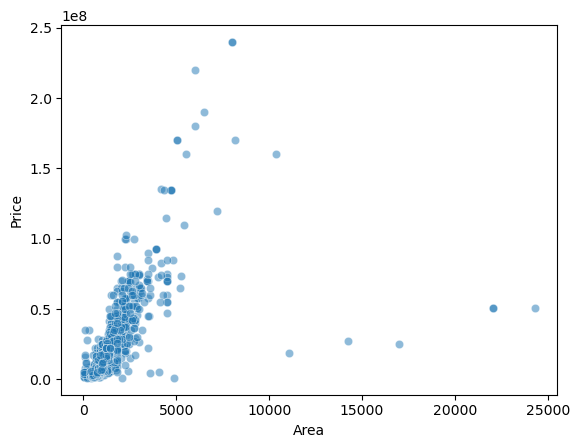

In [145]:
#write your code and answer the questions
sns.scatterplot(data=df, x="Area", y="Price", alpha=0.5)

We can see that the bigger the area of the house, the higher the price of it is.

#### Q7. Plot the price of the properties in each type on boxplot. Make comparison between the distributions of the boxplots.

<Axes: xlabel='Type', ylabel='Price'>

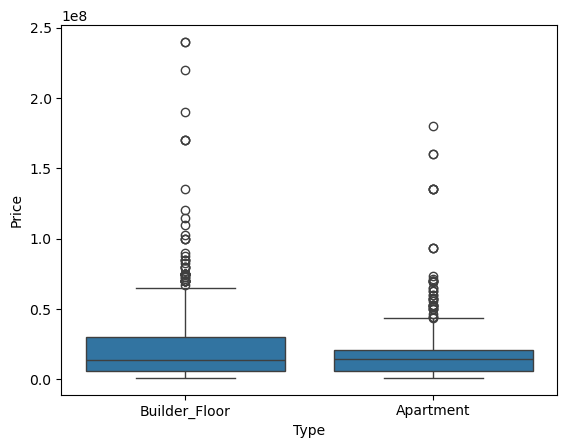

In [146]:
#write your code and anwer the questions

sns.boxplot(data=df, x='Type', y='Price')

#### Q8. Plot the price of the properties in each transaction on boxplot. What do you know from the boxplot?

<Axes: xlabel='Transaction', ylabel='Price'>

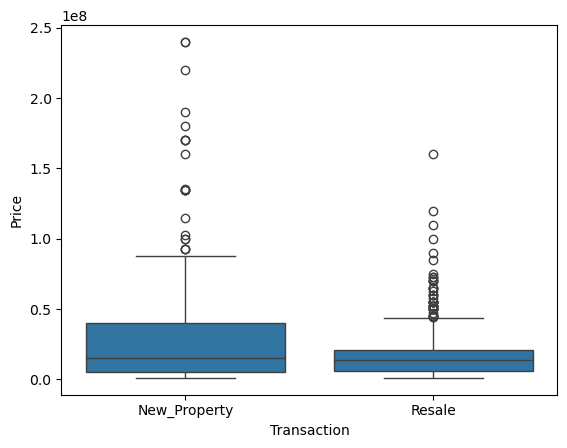

In [147]:
#write your code and answer the question

sns.boxplot(data=df, x='Transaction', y='Price')

### 2. Data Preprocessing

#### Q1. Find the redundancy records in the dataset and remove these records from the dataset.

In [148]:
#write your code and answer the question
df.duplicated().sum()

83

In [149]:
df = df.drop_duplicates()

#### Q2. Suppose the extreme values of BHK and bathroom are outliers. Remove the records containing these outliers using Interquartile Range. Visualize the values before and after.

In [150]:
def remove_outlier_with_iqr(df: pd.DataFrame, column=pd.Series) -> pd.DataFrame:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = (df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))
    return df[~outliers]

<Axes: ylabel='BHK'>

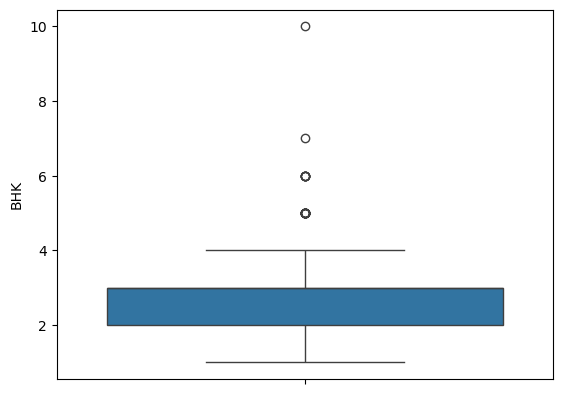

In [151]:
sns.boxplot(data=df, y='BHK')

In [152]:
# remove outliers
df = remove_outlier_with_iqr(df, "BHK")
df

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


<Axes: ylabel='Bathroom'>

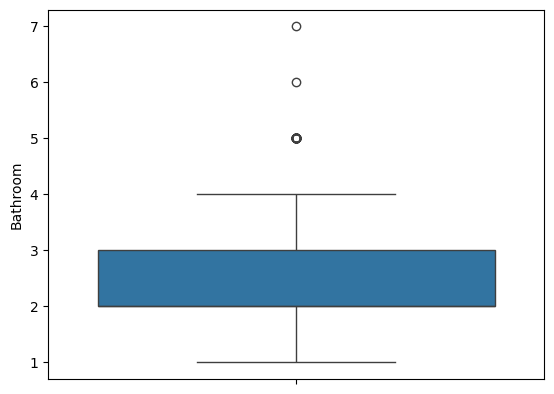

In [153]:
sns.boxplot(data=df, y='Bathroom')

In [154]:
df = remove_outlier_with_iqr(df, 'Bathroom')
df

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1253,1200.0,3,3.0,Semi-Furnished,Chittaranjan Park,1.0,16500000,Ready_to_move,Resale,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


#### Q3. Missing Values

In [155]:
# count missing values for each column
df.isna().sum()

Area             0
BHK              0
Bathroom         1
Furnishing       4
Locality         0
Parking         28
Price            0
Status           0
Transaction      0
Type             4
Per_Sqft       221
dtype: int64

In [156]:
# visualize missing values as percentage
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

missing_value_df

,column_name,percent_missing
Area,Area,0.000000
BHK,BHK,0.000000
Bathroom,Bathroom,0.090992
Furnishing,Furnishing,0.363967
Locality,Locality,0.000000
Parking,Parking,2.547771
Price,Price,0.000000
Status,Status,0.000000
Transaction,Transaction,0.000000
Type,Type,0.363967


<Axes: xlabel='column_name', ylabel='percent_missing'>

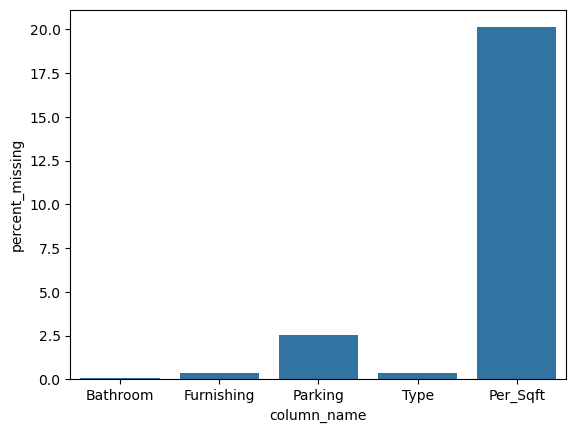

In [157]:
# plot the percentage of missing values as a bar chart
sns.barplot(data=missing_value_df[missing_value_df['percent_missing']>0], x='column_name', y='percent_missing')

In [158]:
# apply imputation
df['Bathroom'] = df['Bathroom'].fillna(df['Bathroom'].mode()[0])
df['Furnishing'] = df['Furnishing'].fillna(df['Furnishing'].mode()[0])
df['Parking'] = df['Parking'].fillna(df['Parking'].mode()[0])
df['Type'] = df['Type'].fillna(df['Type'].mode()[0])
df['Per_Sqft'] = df['Per_Sqft'].fillna(df['Per_Sqft'].median()) 

In [159]:
df.isna().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

#### Q4. Feature Encoding

apply feature encoding for categorical data and replace the original column with the numerical codes (0,1)

In [160]:
#write your code here
labelEncoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = labelEncoder.fit_transform(df[col])

df

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,1,276,1.0,6500000,1,0,1,10556.0
1,750.0,2,2.0,1,137,1.0,5000000,1,0,0,6667.0
2,950.0,2,2.0,0,49,1.0,15500000,1,1,0,6667.0
3,600.0,2,2.0,1,274,1.0,4200000,1,1,1,6667.0
4,650.0,2,2.0,1,275,1.0,6200000,1,0,1,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1253,1200.0,3,3.0,1,44,1.0,16500000,1,1,1,12916.0
1255,1050.0,3,2.0,1,44,3.0,12500000,1,1,1,12916.0
1256,875.0,3,3.0,1,44,3.0,17500000,1,0,1,12916.0
1257,990.0,2,2.0,2,45,1.0,11500000,1,1,1,12916.0


#### Q5. Feature Scaling

transform the numerical columns with feature scaling, replace the original columns with the scaled columns and display the scaled dataframe.

In [161]:
#write your code here
df[numerical_df.columns]

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
0,800.0,3,2.0,1.0,6500000,10556.0
1,750.0,2,2.0,1.0,5000000,6667.0
2,950.0,2,2.0,1.0,15500000,6667.0
3,600.0,2,2.0,1.0,4200000,6667.0
4,650.0,2,2.0,1.0,6200000,6667.0
...,...,...,...,...,...,...
1253,1200.0,3,3.0,1.0,16500000,12916.0
1255,1050.0,3,2.0,3.0,12500000,12916.0
1256,875.0,3,3.0,3.0,17500000,12916.0
1257,990.0,2,2.0,1.0,11500000,12916.0


In [162]:
scaled_columns = ['Area', 'Price', 'Per_Sqft']
standardScaler = StandardScaler()

df[scaled_columns] = standardScaler.fit_transform(df[scaled_columns])

df

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,-0.418199,3,2.0,1,276,1.0,-0.637337,1,0,1,-0.196085
1,-0.460291,2,2.0,1,137,1.0,-0.724095,1,0,0,-0.409679
2,-0.291923,2,2.0,0,49,1.0,-0.116791,1,1,0,-0.409679
3,-0.586567,2,2.0,1,274,1.0,-0.770366,1,1,1,-0.409679
4,-0.544475,2,2.0,1,275,1.0,-0.654689,1,0,1,-0.409679
...,...,...,...,...,...,...,...,...,...,...,...
1253,-0.081464,3,3.0,1,44,1.0,-0.058953,1,1,1,-0.066467
1255,-0.207740,3,2.0,1,44,3.0,-0.290306,1,1,1,-0.066467
1256,-0.355061,3,3.0,1,44,3.0,-0.001114,1,0,1,-0.066467
1257,-0.258250,2,2.0,2,45,1.0,-0.348145,1,1,1,-0.066467
